In [1]:
import glob
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tsa.preprocessing import get_sample_info
from tsa.utils import inference_timeseries, list2floats

# default image size
plt.rcParams['figure.figsize'] = [8, 6]

# Input files

In [2]:
tpm_file = "data/GRCz11-TPM.tsv"
tpms = pd.read_csv(tpm_file, sep="\t", index_col=0)

template_samples_file = "data/white_mpf_samples.tsv"

new_gpr = False
gpr_inference_file = "data/white_mpf_gpr.tsv"
gpr_scores_file = "data/white_mpf_score.tsv"

showcase_gene = "ENSDARG00000000212"

In [3]:
# tpm_file = "data/XT9.1-TPM.tsv"
# tpms = pd.read_csv(tpm_file, sep="\t", index_col=0)

# template_samples_file = "data/owensA1_mpf_samples.tsv"

# new_gpr = False
# gpr_inference_file = "data/owensA1_mpf_gpr.tsv"
# gpr_scores_file = "data/owensA1_mpf_score.tsv"

# showcase_gene = "ENSXETG00000000002"

In [4]:
# retrieve all alignments made to this template
alignment_dir = "alignments"
template_prefix = os.path.basename(template_samples_file).replace("_samples.tsv", "")
pattern = template_prefix + "*_alignment.tsv"
alignment_files = glob.glob(os.path.join(alignment_dir, pattern))
alignment_files.sort()

alignment_files

['alignments/white_mpf_to_levin_mpf_alignment.tsv',
 'alignments/white_mpf_to_marletaz_mpf_alignment.tsv',
 'alignments/white_mpf_to_test_alignment.tsv',
 'alignments/white_mpf_to_white_mpf_alignment.tsv']

In [5]:
template_tpms_inf = pd.read_csv(gpr_inference_file, sep="\t", index_col=0)
extended_timepoints = list2floats(template_tpms_inf.columns)

template_samples = pd.read_csv(template_samples_file, sep="\t", index_col=0)
template_sample_order, template_time2samples = get_sample_info(template_samples)

## alignment plot for all-numeric-time annotated series

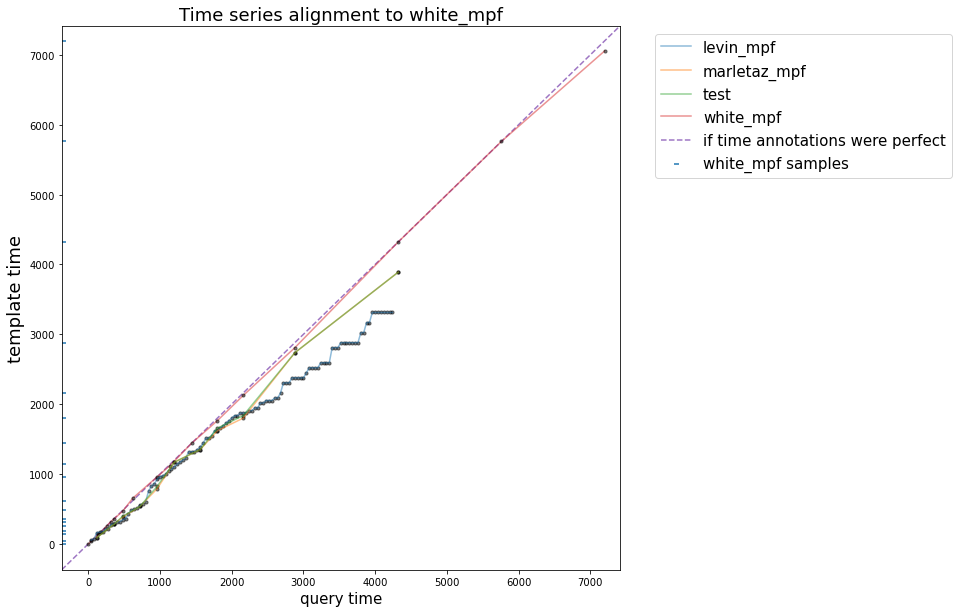

In [6]:
from tsa.combine import plot_offset

# square image
plt.rcParams['figure.figsize'] = [10, 10]

template_time = list2floats(template_time2samples)
fname = None
# fname = "alignments/DR_white_mpf_MultiAlignment.pdf"
# fname = "alignments/XT_owensA1_mpf_MultiAlignment.pdf"
plot_offset(template_time, alignment_files, to_file=fname)


### alignment timeline for either numeric or non-numeric template time

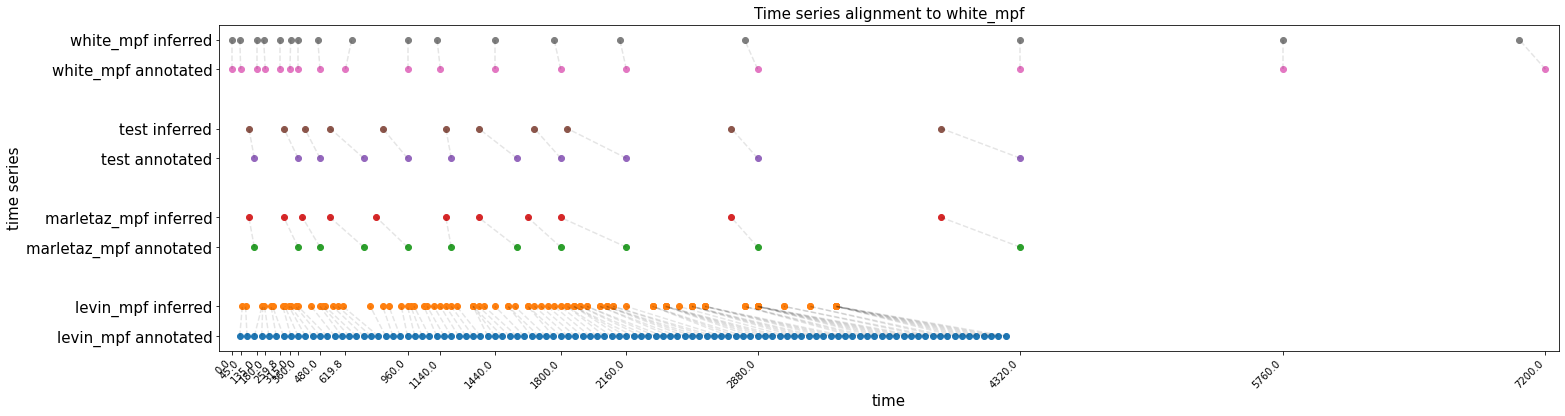

In [7]:
from tsa.combine import plot_timeline

# wide image
plt.rcParams['figure.figsize'] = [24, 6]

template_time = list2floats(template_time2samples)
fname = None
# fname = "alignments/DR_white_mpf.pdf"
# fname = "alignments/XT_owensA1_mpf.pdf"
plot_timeline(template_time, extended_timepoints, alignment_files, to_file=fname)


### alignment timeline (with stage labels)

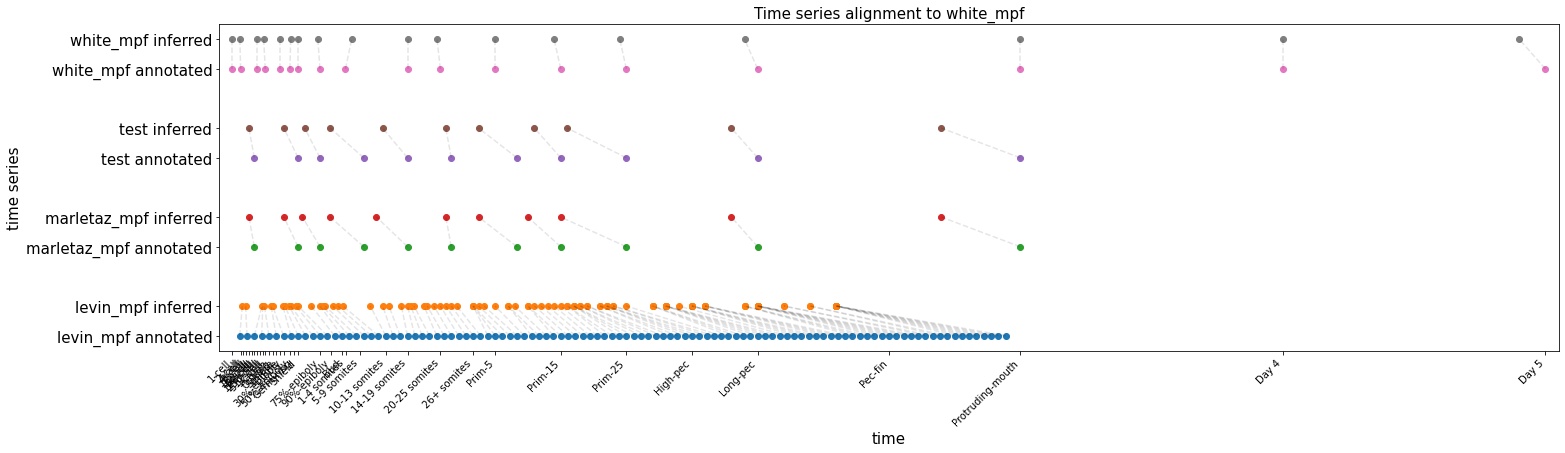

original plot for comparison


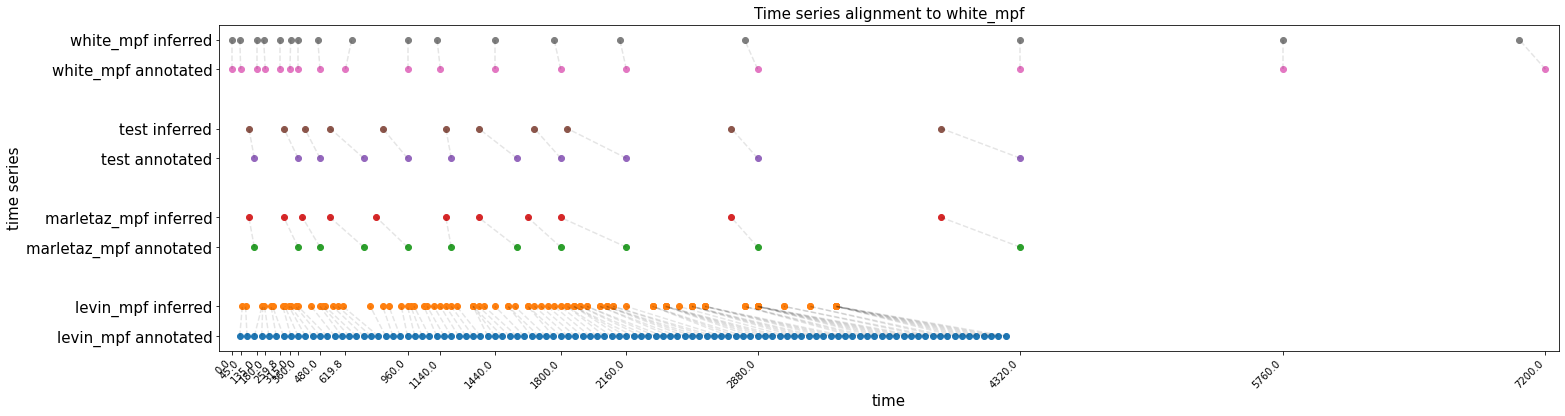

In [8]:
if "GRCz11" in tpm_file:

    # zebrafish minutes post fertilization to stages (from ZFIN)
    all_mpf = [
        0,
        45,
        60,
        75,
        90,
        105,
        120,
        135,
        150,
        165,
        180,
        200,
        220,
        240,
        260,
        280,
        315,
        340,
        360,
        480,
        540,
        600,
        620,
        700,
        840,
        960,
        1140,
        1320,
        1440,
        1800,
        2160,
        2520,
        2880,
        3600,
        4320,
        5760,
        7200,
        8640,
        10080,
        20160,
        30240,
        43200,
        64800,
    ][:-6]  # we dont have timepoints this late
    all_stages = [
        "1-cell",
        "2-cell",
        "4-cell",
        "8-cell",
        "16-cell",
        "32-cell",
        "64-cell",
        "128-cell",
        "256-cell",
        "512-cell",
        "1k-cell",
        "High",
        "Oblong",
        "Sphere",
        "Dome",
        "30%-epiboly",
        "50%-epiboly",
        "Germ-ring",
        "Shield",
        "75%-epiboly",
        "90%-epiboly",
        "Bud",
        "1-4 somites",
        "5-9 somites",
        "10-13 somites",
        "14-19 somites",
        "20-25 somites",
        "26+ somites",
        "Prim-5",
        "Prim-15",
        "Prim-25",
        "High-pec",
        "Long-pec",
        "Pec-fin",
        "Protruding-mouth",
        "Day 4",
        "Day 5",
        "Day 6",
        "Days 7-13",
        "Days 14-20",
        "Days 21-29",
        "Days 30-44",
        "Days 45-89",
    ][:-6]  # we dont have timepoints this late

    # wide image
    plt.rcParams['figure.figsize'] = [24, 6]
    fname = None
    # fname = "alignments/XT_owensA1_stages.pdf"
    plot_timeline(all_mpf, extended_timepoints, alignment_files, all_stages, to_file=fname)
    
    print("original plot for comparison")
    plot_timeline(template_time, extended_timepoints, alignment_files, to_file=None)

In [9]:
if "XT9.1" in tpm_file:

    # xenopus minutes post fertilization to stages
    all_mpf = [
        240.0,
        315.0,
        420.0,
        480.0,
        555.0,
        660.0,
        750.0,
        825.0,
        870.0,
        900.0,
        930.0,
        960.0,
        1005.0,
        1065.0,
        1110.0,
        1185.0,
        1290.0,
        1380.0,
        1500.0,
        1650.0,
        1740.0,
        1800.0,
        1890.0,
        2040.0,
        2160.0,
    ]
    all_stages = [
        'stage8',
        'stage9',
        'stage10',
        'stage11',
        'stage12',
        'stage12.5',
        'stage13',
        'stage14',
        'stage15',
        'stage17',
        'stage19',
        'stage20',
        'stage21',
        'stage22',
        'stage23',
        'stage24',
        'stage25',
        'stage26',
        'stage27',
        'stage28',
        'stage30',
        'stage31',
        'stage32',
        'stage34',
        'stage35',
    ]

    # wide image
    plt.rcParams['figure.figsize'] = [24, 6]
    fname = None
    # fname = "alignments/XT_owensA1_stages.pdf"
    plot_timeline(all_mpf, extended_timepoints, alignment_files, all_stages, to_file=fname)
    
    print("original plot for comparison")
    plot_timeline(template_time, extended_timepoints, alignment_files, to_file=None)